In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
import csv
import numpy as np
import PIL 
import pandas as pd
defaults.device = torch.device('cuda')

In [3]:
#!pip install kaggle
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""

In [4]:
!ls

00_notebook_tutorial.ipynb	       lesson3-planet.ipynb
ahdd1.zip			       lesson4-collab.ipynb
arabic_handwriting.ipynb	       lesson4-tabular.ipynb
Arabic Handwritten Digits Dataset CSV  lesson5-sgd-mnist.ipynb
csvtest.csv			       lesson6-pets-more.ipynb
csvtestlabel.csv		       lesson6-rossmann.ipynb
csvtrain.csv			       lesson7-human-numbers.ipynb
csvtrainlabel.csv		       lesson7-resnet-mnist.ipynb
data				       lesson7-superres-gan.ipynb
digits				       lesson7-superres-imagenet.ipynb
images				       lesson7-superres.ipynb
lesson1-pets.ipynb		       lesson7-wgan.ipynb
lesson2-download.ipynb		       my.png
lesson2-sgd.ipynb		       pix.png
lesson3-camvid.ipynb		       rossman_data_clean.ipynb
lesson3-camvid-tiramisu.ipynb	       test
lesson3-head-pose.ipynb		       Train + Test Matlab.mat
lesson3-imdb.ipynb


In [5]:
#ingest csv to pandas dataframe
train = pd.read_csv('csvtrain.csv', nrows=2000)

In [6]:
train.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.486,0.487,0.488,0.489,0.490,0.491,0.492,0.493,0.494,0.495
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#uses pandas
def pdMakePlot(row):
    pixels = np.array(train.iloc[[row]], dtype='uint8')
    pixels = pixels.reshape((28, 28)).T
    pixels = np.true_divide(pixels, 255)
    dim2 = np.zeros((28,28))
    dim3 = np.zeros((28,28))
    pix = np.stack((pixels, dim2,dim3), axis=2)
    row += 1
    filename = "digits/%s.png" % row
    plt.imsave(filename, pix)
#    plt.imshow(pix)
    plt.close('all')
    return

In [8]:
#load train data
trainrows = 4000
x = 5
train = pd.read_csv('csvtrain.csv', nrows=trainrows)
train.iloc[[x]]

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.486,0.487,0.488,0.489,0.490,0.491,0.492,0.493,0.494,0.495
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#load test data
testrows = 5
x = 3
test = pd.read_csv('csvtest.csv', nrows=testrows) 
test.iloc[[x]]

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.538,0.539,0.540,0.541,0.542,0.543,0.544,0.545,0.546,0.547
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
csv = np.genfromtxt ('csvtrainlabel.csv', delimiter=",")
csv = csv[0:trainrows]
csv = csv.astype('int32')
csv = np.add(csv,1)
csv[csv == 10] = 0

In [11]:
csv

array([1, 2, 3, 4, ..., 7, 8, 9, 0], dtype=int32)

In [12]:
#np array that we'll make into the filenames
#from 1 to trainrows
trainrange = trainrows +1
files = np.arange(1,trainrange)
files = files.astype(str)
files

array(['1', '2', '3', '4', ..., '3997', '3998', '3999', '4000'], dtype='<U21')

In [13]:
len(files)

4000

In [14]:
#convert to filenames
i = 0;
j = 1;
for file in files:
    files[i] = "%s.png" % j
    i += 1
    j += 1
    if i >= trainrange: break

In [15]:
#confirm the filenames in the array
files

array(['1.png', '2.png', '3.png', '4.png', ..., '3997.png', '3998.png', '3999.png', '4000.png'], dtype='<U21')

In [16]:
#combine two arrays into dataframe and add header
df = pd.DataFrame({'name':files, 'label':csv})
df.head()

,name,label
0,1.png,1
1,2.png,2
2,3.png,3
3,4.png,4
4,5.png,5


In [17]:
i = 0
max = trainrange-1
for x in range(i,max):
    pdMakePlot(i)
    i += 1

In [18]:
bs = 24

In [19]:
path = '/home/ec2-user/SageMaker/course-v3/nbs/dl1/digits/'
path

'/home/ec2-user/SageMaker/course-v3/nbs/dl1/digits/'

In [20]:
ImageDataBunch.from_df

<bound method ImageDataBunch.from_df of <class 'fastai.vision.data.ImageDataBunch'>>

In [21]:
tfms = get_transforms(do_flip=False)

In [22]:
data = ImageDataBunch.from_df(path=path, df = df, ds_tfms=tfms, size=24)

In [23]:
img = open_image('/home/ec2-user/SageMaker/course-v3/nbs/dl1/digits/3999.png')
img

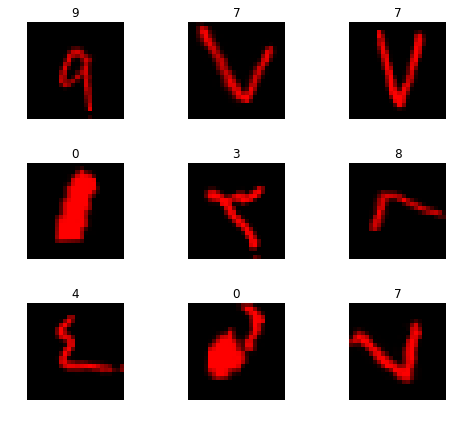

In [24]:
data.show_batch(rows=3, figsize=(7,6))

In [25]:
print(data.classes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [26]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

In [27]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [28]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy
1,1.461245,0.665243,0.802500
2,0.790824,0.228773,0.931250
3,0.502614,0.166105,0.961250
4,0.387829,0.167723,0.955000


In [29]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


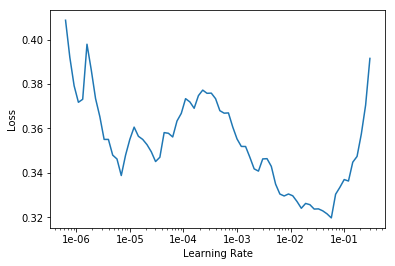

In [30]:
learn.recorder.plot()

In [31]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(.006, .004))

epoch,train_loss,valid_loss,accuracy
1,0.287015,0.307796,0.928750
2,0.221842,0.030812,0.991250
3,0.124907,0.009651,0.996250


In [32]:
test = pd.read_csv('csvtest.csv', nrows=5)
test2 = test.iloc[[3]]
test2.values

array([[0, 0, 0, 0, ..., 0, 0, 0, 0]])

In [33]:
pixels = np.array(test2.values, dtype='uint8')
pixels = pixels.reshape((28, 28)).T
pixels = np.true_divide(pixels, 255)
dim2 = np.zeros((28,28))
dim3 = np.zeros((28,28))
pix = np.stack((pixels, dim2,dim3), axis=2)
filename = "test/%s.png" % 3
plt.imsave(filename, pix)
#    plt.imshow(pix)
plt.close('all')

In [34]:
img = open_image('/home/ec2-user/SageMaker/course-v3/nbs/dl1/test/3.png')
img

In [35]:
#now to production
defaults.device = torch.device('cpu')

In [36]:
#learn = load_learner(path)
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category 4